In [604]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [140]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
data.shape

(1460, 81)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [144]:
# выделяем исследуемый признак
data_y = data[['SalePrice']]
data_y.head(1)

,SalePrice
0,208500


In [145]:
data.drop('SalePrice', axis=1, inplace=True)
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [479]:
# разбиваем на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2)

In [480]:
X_test.shape

(292, 80)

In [481]:
# объединяю X_train X_test для совместной предобработки данных, 
# иначе, часто получается разное количество фичей,из-за pd.get_dummies
X_test['is_train'] = 0
X_train['is_train'] = 1
X_train_test = pd.concat([X_train, X_test], axis=0,)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [482]:
X_train_test.shape

(1460, 81)

In [483]:
# предобработка тренировочных данных 
# работа с категориальными признаками: получение, заполнение пропусков
cat_feat = list(X_train_test.dtypes[X_train_test.dtypes == object].index)
X_train_test[cat_feat].fillna('nan')
dummy_train_test = pd.get_dummies(X_train_test[cat_feat], columns=cat_feat)
X_train_test.drop(cat_feat, axis=1, inplace=True)

# работа с числовыми признаками: получение, работа с пропущенными значениями, маштабирование, 

num_feat = [f for f in X_train_test  if f not in (cat_feat + ['Id', 'is_train'] )]
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='median')
X_train_test[num_feat] = imp.fit_transform(X_train_test.loc[:,num_feat])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_test[num_feat])
X_train_test[num_feat] = scaler.transform(X_train_test[num_feat])


In [486]:
# объединение числовых и категориальных признаков
X_train_test_prepared = pd.concat([X_train_test[num_feat], dummy_train_test, X_train_test['is_train']], axis=1)
columns = X_train_test_prepared.columns
X_train_test_prepared.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,is_train
88,-0.163109,1.595644,-0.205137,-2.241782,-3.214027,-1.863632,-0.138856,-0.57075,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,0,1
447,0.073375,-0.039223,0.069872,0.651479,-0.517200,0.885390,0.684854,-0.57075,-0.973018,-0.288653,...,0,0,1,0,0,0,0,1,0,1
1323,-0.636078,-0.902070,-0.519834,-1.518467,1.280685,-1.035613,-1.689368,-0.57075,-0.358905,-0.288653,...,0,0,1,0,0,0,0,1,0,1
1349,0.309859,-0.902070,-0.527852,1.374795,-0.517200,-3.287824,0.103412,-0.57075,-0.404963,-0.288653,...,0,0,1,0,0,0,0,1,0,1
589,-0.399594,-0.902070,-0.141997,-0.795151,0.381743,-1.366820,-1.204833,-0.57075,-0.973018,-0.288653,...,0,0,1,0,0,0,0,1,0,1


In [506]:
# разделение тестовой и обучающей выборки
X_train_prepared = X_train_test_prepared[X_train_test_prepared['is_train'] == 1]
X_test_prepared = X_train_test_prepared[X_train_test_prepared['is_train'] == 0] 
X_train_prepared.drop('is_train', axis=1, inplace=True)
X_test_prepared.drop('is_train', axis=1, inplace=True)
X_train_prepared.head(1)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
88,-0.163109,1.595644,-0.205137,-2.241782,-3.214027,-1.863632,-0.138856,-0.57075,-0.973018,-0.288653,...,0,0,0,0,1,0,0,0,0,0


In [507]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)
reg_tree.fit(X_train_prepared, y_train)
y_pred_train = reg_tree.predict(X_train_prepared)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, y_pred_train))

7759.16616897017

In [508]:
pd.Series(reg_tree.feature_importances_).sort_values(ascending=False).head()


3     0.661625
15    0.093256
13    0.046224
11    0.040920
8     0.018703
dtype: float64

In [509]:
print(columns[3])
# № 3  - OverallQual: Rates the overall material and finish of the house
print(columns[15])
# № 15 - GrLivArea: Above grade (ground) living area square feet

OverallQual
GrLivArea


In [510]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_jobs=-1)
rfr_model.fit(X_train_prepared, np.ravel(y_train))
y_pred_train5 = rfr_model.predict(X_train_prepared)
np.sqrt(mean_squared_error(y_train, y_pred_train5))

13638.032707217473

In [511]:
pd.Series(rfr_model.feature_importances_).sort_values(ascending=False).head()

3     0.600908
15    0.091564
11    0.039367
13    0.037481
8     0.026365
dtype: float64

In [526]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression(n_jobs=-1, normalize=True)
lin_reg_model.fit(X_train_prepared, y_train)
y_pred_train2 = lin_reg_model.predict(X_train_prepared)
np.sqrt(mean_squared_error(y_train, y_pred_train2))

20247.669744179188

In [528]:
from sklearn.linear_model import SGDRegressor
SGDR_model =  SGDRegressor()
SGDR_model.fit(X_train_prepared, np.ravel(y_train))
y_pred_train3 = SGDR_model.predict(X_train_prepared)
np.sqrt(mean_squared_error(y_train, y_pred_train3))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


26436.74645445958

In [514]:
from sklearn.linear_model import ARDRegression
L_model = ARDRegression()
L_model.fit(X_train_prepared, np.ravel(y_train))
y_pred_train4 = L_model.predict(X_train_prepared)
np.sqrt(mean_squared_error(y_train, y_pred_train4))

25017.302626913544

In [515]:
# Использование 10-fold кросс-валидации для случайного леса
from sklearn.model_selection import StratifiedKFold
stack_cv = StratifiedKFold(n_splits=10, random_state=555)

result = []

for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train_prepared, y_train)):
    rfr_model = RandomForestRegressor()
    rfr_model.fit(X_train_prepared.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
    predict_y = rfr_model.predict(X_train_prepared.iloc[test_ind])
    result.append(np.sqrt(mean_squared_error(y_train.iloc[test_ind], predict_y)))
result

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[52990.59462286585,
 24867.077301934965,
 24083.95907093223,
 21060.285410669552,
 16505.407548102146,
 23646.094317022256,
 33968.4150994479,
 16129.372354879557,
 15762.529242637427,
 9939.986742948906]

In [516]:
np.array(result).mean()

23895.372171144078

## стекинг

In [574]:
# стекинг
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], np.ravel(y_train.iloc[train_ind]))
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind]).reshape(len(test_ind),1)
        meta_test += clf.predict(X_test).reshape(len(X_test),1)
    
    return meta_train, meta_test / stack_cv.n_splits

In [575]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('DecisionTreeRegressor')
meta_tr, meta_te = get_meta_features(reg_tree, X_train_prepared, y_train, X_test_prepared, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('DTR_pred')

print('RandomForestRegressor')
meta_tr, meta_te = get_meta_features(rfr_model, X_train_prepared, y_train, X_test_prepared, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('RFR_pred')

print('LinearRegression')
meta_tr, meta_te = get_meta_features(lin_reg_model, X_train_prepared, y_train, X_test_prepared, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('LR_pred')

print('SGDRegressor')
meta_tr, meta_te = get_meta_features(SGDR_model, X_train_prepared, y_train, X_test_prepared, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('SGDR_pred')


DecisionTreeRegressor


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


RandomForestRegressor
LinearRegression


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SGDRegressor


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [587]:
X_meta_train = pd.DataFrame(np.hstack(meta_train), columns=col_names)                             
X_meta_train.head()

,DTR_pred,RFR_pred,LR_pred,SGDR_pred
0,128882.352941,121600.0,32000.0,14405.545259
1,225000.000000,189050.0,206336.0,213919.548355
2,97250.000000,106950.0,106752.0,88692.503231
3,159500.000000,201250.0,122368.0,132397.236268
4,117676.470588,103890.0,97792.0,70722.731741


In [588]:
X_meta_test = pd.DataFrame(np.hstack(meta_test), columns=col_names)
X_meta_test.head()

,DTR_pred,RFR_pred,LR_pred,SGDR_pred
0,94141.946387,94646.50,82498.8,84986.872884
1,151580.611799,171320.43,190385.2,170383.012043
2,151790.000000,160931.00,147514.0,143651.491072
3,196185.036007,210102.90,209072.0,212025.218371
4,181354.929032,187054.96,187905.8,191098.956125


In [594]:
# метаалгоритм
lin_reg_model = LinearRegression(n_jobs=-1)
lin_reg_model.fit(X_meta_train, y_train)

y_pred_meta_test = lin_reg_model.predict(X_meta_test)

In [602]:
np.sqrt(mean_squared_error(y_test, y_pred_meta_test))

40498.55963243558

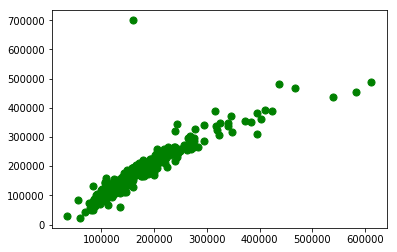

In [609]:
plt.scatter(y_test, y_pred_meta_test, c='green', s=50, cmap='rainbow')
plt.show()